# (Exploratory Analysis of Prosper Loan Data)
## by (Chen Yi Fei)

## Preliminary Wrangling

>This dataset is financial dataset and this is related to the loan, borrowers, lenders, interest rates and stuffs like that. This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others. I am using the data from the Posper to analyse it and trying to find the pattern in the data

In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [43]:
df_loandata = pd.read_csv('prosperLoanData.csv')
df_loandata.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


>rename column lable for easier access

In [44]:
df_loandata.rename(columns={'ProsperRating (numeric)':'ProsperRating_num', 
                            'ProsperRating (Alpha)':'ProsperRating_alpha', 
                            'ListingCategory (numeric)':'ListingCategory_num',
                            'TradesNeverDelinquent (percentage)':'TradesNeverDelinquent_percent'},inplace=True)
#df_loandata.columns

In [45]:
## drop duplicate loans according to LoanNumber
df_loandata.drop_duplicates(subset='LoanNumber',inplace=True)

In [46]:
df_loandata['default_flag'] = (df_loandata.LoanStatus=='Defaulted')
#df_loandata['default_flag']

### What is the structure of your dataset?

> The dataset contains 113,397 records of data and 81 features. The data contains infomation of each loan origination and various features. The features have various aspects to describe the main credit profile of borrower of each loan listing for exmaple financial status, employment status, etc.  

### What is/are the main feature(s) of interest in your dataset?

> My target is to find any patterns to interpret the potential behavior or features to loan status especially defaulted loan. Besides, I am also interested to explore the potetial features to determine level of borrower cost. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will start to look at financial relevant features such as income, occupation, loan purpose that are most relevant to loan status and borrower cost. 

## Univariate Exploration

> 

#### LoanOriginationDate
> The numbers of loan originaed vary from year to year. I am curious to understand whether the actual default frequency follows the number of loan origination across years .

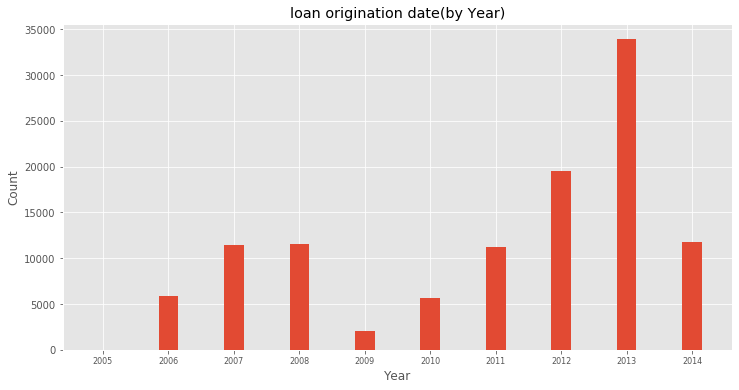

In [47]:
## loan origination date
df_loandata.LoanOriginationDate = pd.to_datetime(df_loandata.LoanOriginationDate)
df_loandata['LoanOriginationDate_y'] = df_loandata.LoanOriginationDate.dt.year
df_loandata.LoanOriginationDate = pd.to_datetime(df_loandata.LoanOriginationDate)
df_loandata['LoanOriginationDate_y'] = df_loandata.LoanOriginationDate.dt.year
plt.style.use('ggplot')
index = df_loandata['LoanOriginationDate_y'].value_counts().index
val=df_loandata['LoanOriginationDate_y'].value_counts().values

plt.figure(figsize=(12,6));
plt.bar(x=index,height=val,width=0.3);
plt.xlabel("Year");
plt.xticks(index,fontsize=8)
plt.ylabel("Count");
#plt.yticks(np.arange(0,val.max()+2500,2500),fontsize=8)
plt.title("loan origination date(by Year)");

plt.show()

#### ListingCategory
> Listing Category is generally important to the assessment of each loan application. From the disctribution, I observe the Debt Consolidation is the most frequent purpose of borrowing loans. I am curious to understand whether the actual default frequency follows the same pattern.

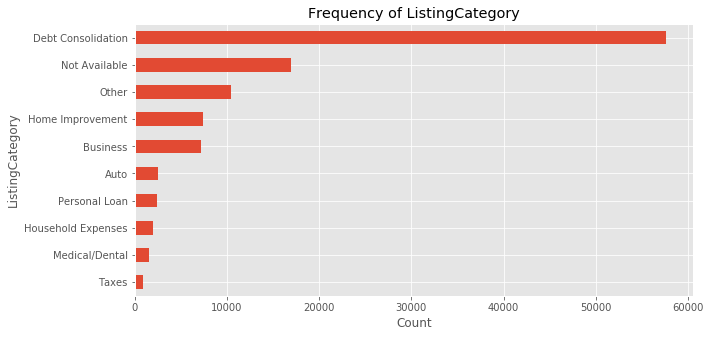

In [48]:
## assign ListingCategory_num xxxxx
df_loandata.ListingCategory_num = df_loandata.ListingCategory_num.astype('int')
df_loandata['ListCat_name'] = df_loandata.ListingCategory_num.replace(
    {0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business',
     4:'Personal Loan', 5:'Student Use', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 
     9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring', 12:'Green Loans', 
     13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle',
     17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'})

plt.figure(figsize=(12,6))
df_loandata['ListCat_name'].value_counts().sort_values().tail(10).plot.barh(title='ListingCategory',figsize=(10,5));
plt.xlabel("Count");
plt.ylabel("ListingCategory");
plt.title("Frequency of ListingCategory");
plt.show()

#### Occupation
> Occupation always implies the potential ability to repay the debt. From the disctribution, I observe the majority of borrower not addressed to any particular occupation("Others") or professional worker such as "professional" and "computer programmer". I am curious to understand whether the actual default frequency within each occupation will show any pattern of default.

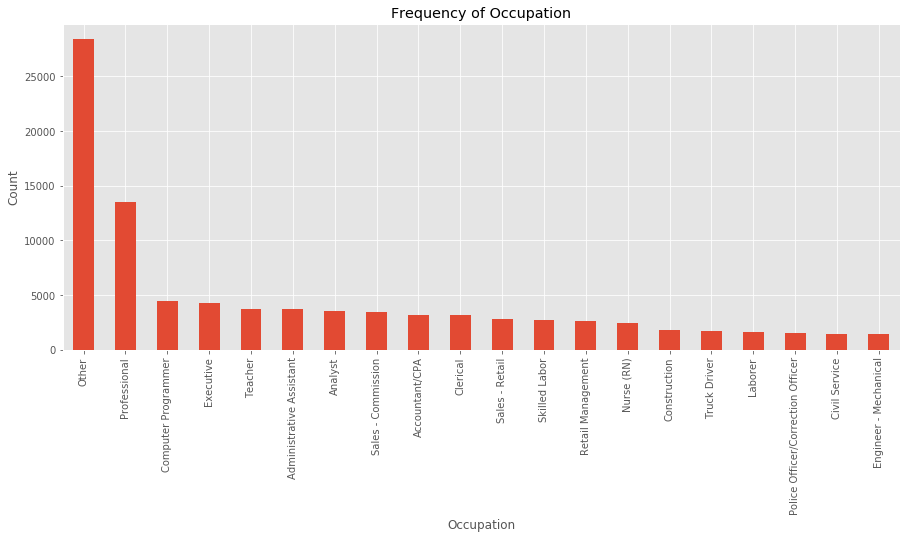

In [49]:
## loandata probability in occupation
loandata_occup = df_loandata.Occupation.value_counts();
loandata_occup.sort_values(ascending=False,inplace=True);
loandata_occup.head(20).plot.bar(figsize=(15,6));
plt.xlabel("Occupation");
plt.ylabel("Count");
plt.title("Frequency of Occupation");
plt.show()

#### Employment Status
> Employment status always implies the stability of income to repay the debt. From the disctribution, I observe the majority of borrower are indicated either employed or full-time worker. I am curious to understand whether the indicator really leads to lower defaulted loan.

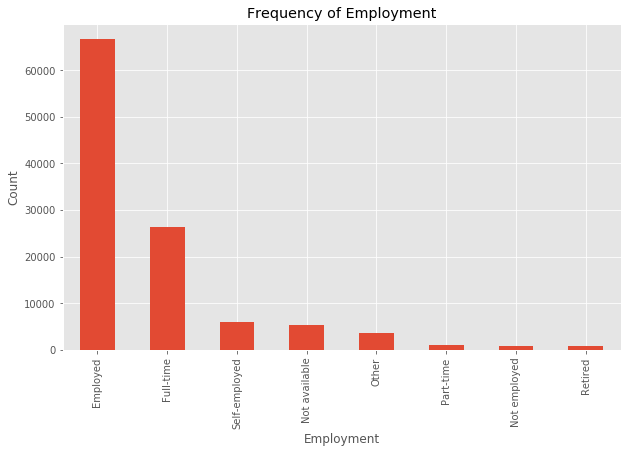

In [50]:
## employment status
df_loandata.EmploymentStatus.value_counts().plot.bar(title='employment',figsize=(10,6));
plt.xlabel("Employment");
plt.ylabel("Count");
plt.title("Frequency of Employment");
plt.show()

#### IsHomeOwner
> Generally, to own a house property shows positive financial status to supportdebt obligation. From the disctribution, I observe borrower is indicated about half of population who own house property. I am curious to understand whether the indicator follows normal common sense that to own a property leads lower defaulted loan in this dataset.

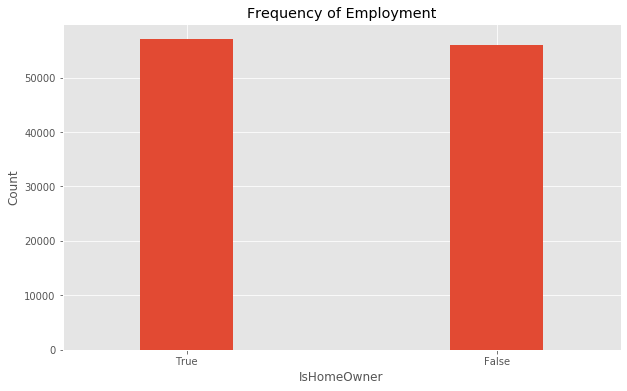

In [51]:
## homeowner get lower pd rate
df_loandata.IsBorrowerHomeowner.value_counts().plot.bar(figsize=(10,6),width=0.3);
plt.xlabel("IsHomeOwner");
plt.xticks(rotation=0);
plt.ylabel("Count");
plt.title("Frequency of Employment");
plt.show()

#### Lender Yield
> Generally, from this distribution, the yield ranges from 0.0015 to 0.4925. it shows very wide distribution. I am curious to explore any pattern in subgroup for example occupation, loan purpose etc..

In [52]:
df_loandata['LenderYield'].describe()

count    113066.000000
mean          0.182882
std           0.074612
min          -0.010000
25%           0.124500
50%           0.174000
75%           0.240600
max           0.492500
Name: LenderYield, dtype: float64

In [53]:
## remove values less than zero, normally lender yield shall be positive
outlier = df_loandata.loc[df_loandata['LenderYield']<=0,'LenderYield'].index
df_loandata.drop(outlier,inplace=True)

In [54]:
df_loandata['LenderYield'].describe()

count    113044.000000
mean          0.182919
std           0.074574
min           0.001500
25%           0.124575
50%           0.174000
75%           0.240600
max           0.492500
Name: LenderYield, dtype: float64

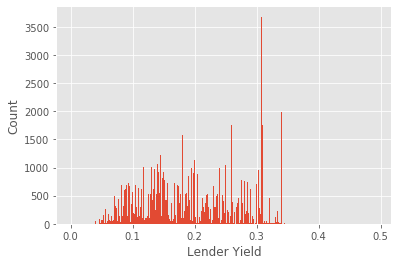

In [55]:
df_loandata['LenderYield'].hist(bins = 600);
plt.xlabel("Lender Yield");
plt.ylabel("Count");
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of my selected variables are catogory ones. I did't find any unusal point and don't need any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Lender yield is the only one numerical variable to be selected.I found some values are less or equalto zero. That is not ususal in normal ssituation so I remove all of them for data cleaning. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> In order to analyze defaulted loan further, so I create a dataframe of defaulted loan only.

In [56]:
df_default=df_loandata.copy()
df_default=df_default[df_default['LoanStatus']=='Defaulted'].reset_index(drop=True)
df_default.shape

(5016, 84)

#### Default Probability distribution by Loan Origination Year
>From this observation,the default probability shows the highest value on 2006 and diminishes from year to year.    

2006    1372
2007    1585
2008    1050
2009      79
2010     187
2011     347
2012     357
2013      39
Name: LoanOriginationDate_y, dtype: int64

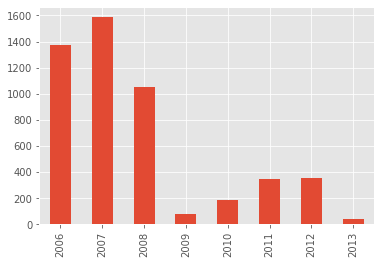

In [57]:
## assign datetime type to proper field and create new features from it
df_default.LoanOriginationDate = pd.to_datetime(df_default.LoanOriginationDate)
df_default['LoanOriginationDate_y'] = df_default.LoanOriginationDate.dt.year
df_default['LoanOriginationDate_y'].value_counts().sort_index().plot.bar();
df_default['LoanOriginationDate_y'].value_counts().sort_index()

2005       22
2006     5901
2007    11449
2008    11546
2009     2047
2010     5652
2011    11228
2012    19553
2013    33912
2014    11734
Name: LoanOriginationDate_y, dtype: int64

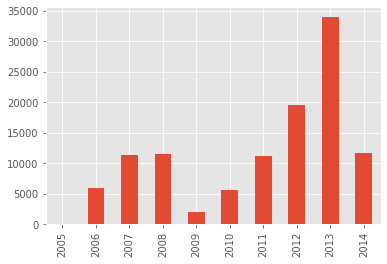

In [58]:
## assign datetime type to proper field and create new features from it
df_loandata['LoanOriginationDate_y'].value_counts().sort_index().plot.bar();
df_loandata['LoanOriginationDate_y'].value_counts().sort_index()

2005    0.000000
2006    0.232503
2007    0.138440
2008    0.090941
2009    0.038593
2010    0.033086
2011    0.030905
2012    0.018258
2013    0.001150
2014    0.000000
Name: LoanOriginationDate_y, dtype: float64

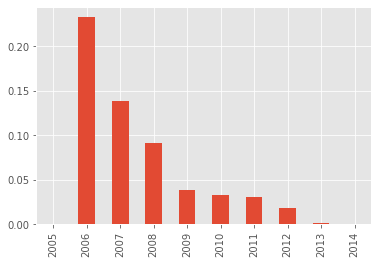

In [59]:
a= df_default['LoanOriginationDate_y'].value_counts() / df_loandata['LoanOriginationDate_y'].value_counts()
a.fillna(0,inplace=True)
a.plot.bar();
a

In [60]:
#sb.countplot(data = df_loandata, x = 'LoanOriginationDate_y', hue = 'default_flag')

#### Default Probability distribution by Listing Category
>From this observation,the default probability shows the highest value in goroup of "Not Available" and followed by "Personal Loan","Student Use".   

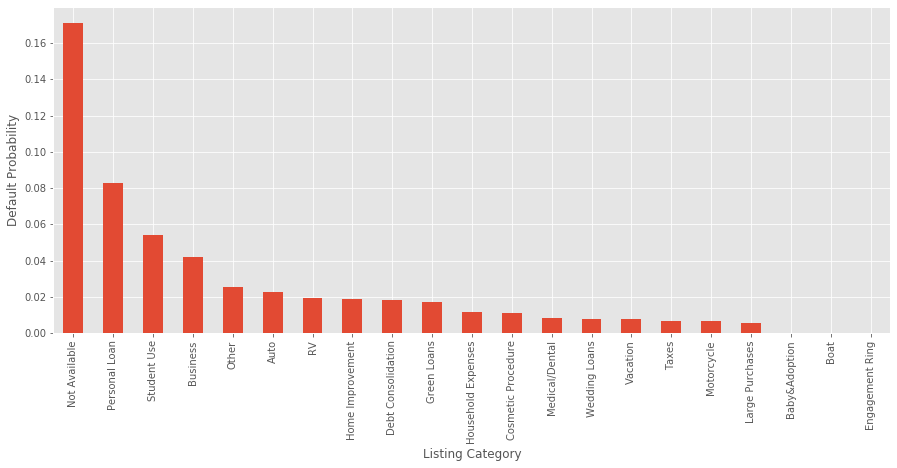

In [61]:
## assign ListingCategory xxxxx
list_cat_default_ratio = df_default.ListCat_name.value_counts()/df_loandata.ListCat_name.value_counts()
list_cat_default_ratio.sort_values(ascending=False,inplace=True)
list_cat_default_ratio.plot.bar(figsize=(15,6));
plt.xlabel("Listing Category");
#plt.xticks(rotation=0);
plt.ylabel("Default Probability");
#plt.title("Frequency of Employment");
plt.show()

#### Default Probability distribution by Occupation
>From this observation,the default probability shows that high default frequency appears in the occupation to do with strudent.   

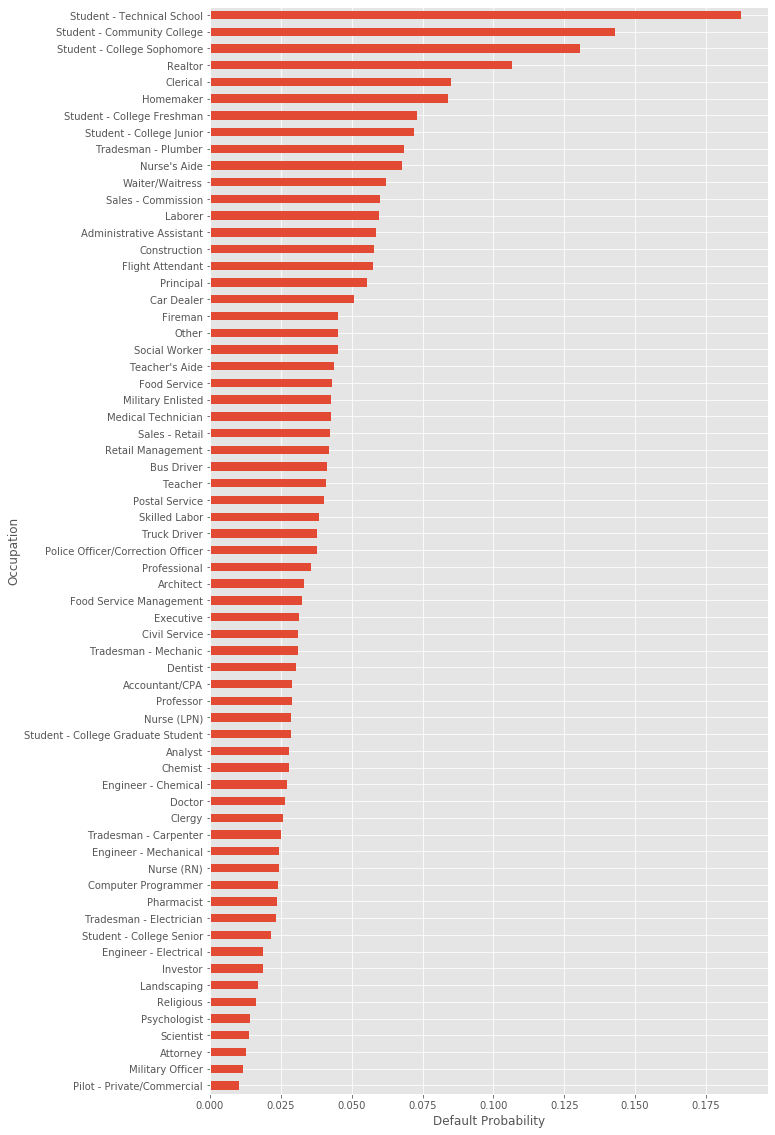

In [62]:
## default probability in occupation
default_occup = df_default.Occupation.value_counts()/df_loandata.Occupation.value_counts()
default_occup.dropna(inplace=True)
default_occup.sort_values(ascending=True,inplace=True)
default_occup.plot.barh(figsize=(10,20))
plt.xlabel("Default Probability");
plt.ylabel("Occupation");
#plt.title("Frequency of Employment");
plt.show()

#### Default Probability distribution by Employment Status
>From this observation,the default probability shows that high default frequency appears when borrower doesn't declare employment status.   

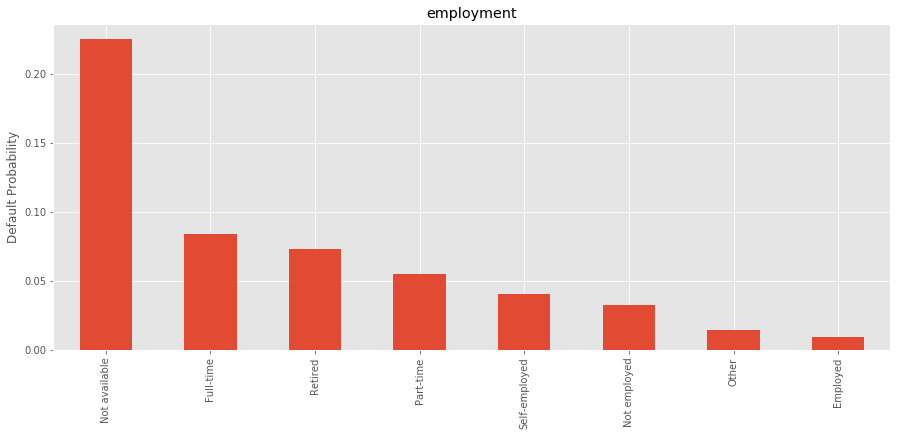

In [63]:
## employment status
default_employ=df_default.EmploymentStatus.value_counts()/df_loandata.EmploymentStatus.value_counts() 
default_employ.sort_values(ascending=False).plot.bar(figsize=(15,6),title='employment');
plt.ylabel("Default Probability");
#plt.ylabel("Occupation");
plt.show()

#### Default Probability distribution by Income Range
>From this observation,the default probability shows that high default frequency appears when borrower doesn't want to declare his income range.  

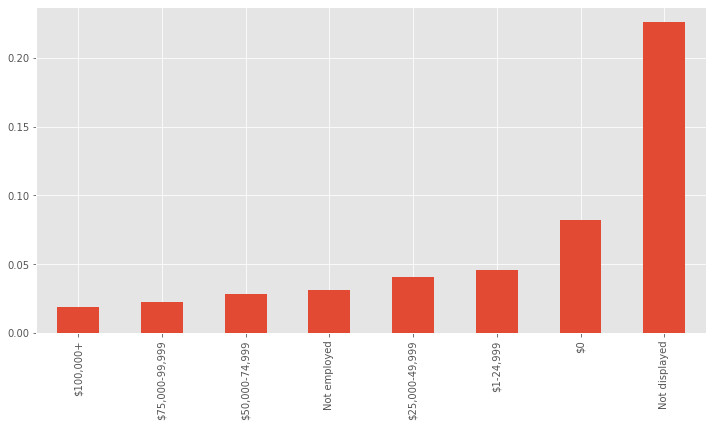

In [64]:
## income range
pd_income_range=df_default.IncomeRange.value_counts()/df_loandata.IncomeRange.value_counts()
pd_income_range.sort_values().plot.bar(figsize=(12,6))
plt.show()

#### Lender Yield distribution by Employment Status
>From this observation, I observe that "Not employed" shows the highest Lender Yield.  

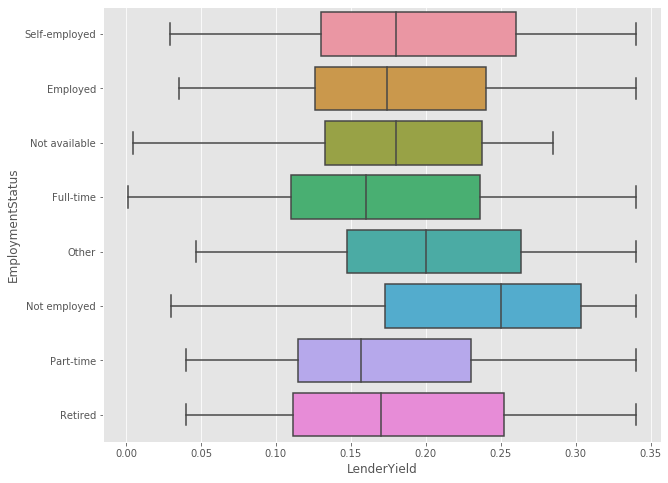

In [65]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = df_loandata, x ='LenderYield' , y = 'EmploymentStatus');

#### Lender Yield distribution by Income Range
>From this observation, I observe that "Not employed" also shows the highest Lender Yield on average.

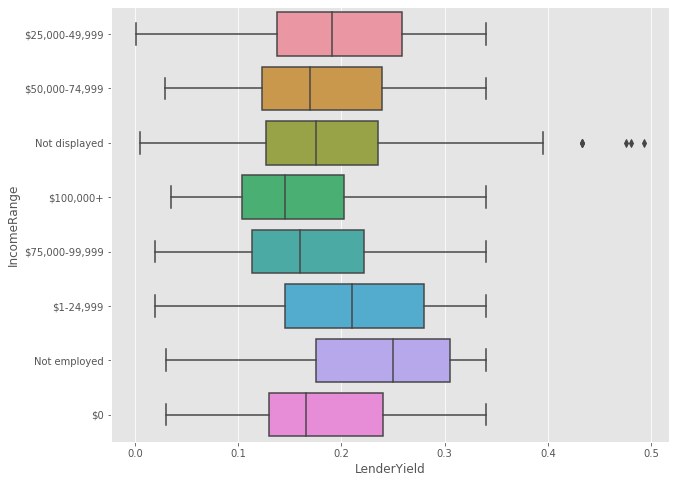

In [66]:
plt.figure(figsize = [10, 8])
sb.boxplot(data = df_loandata, x ='LenderYield' , y = 'IncomeRange');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From this bi-variate analysis, I try to compare Loan Status agaisn some key features that I think it's relevant to default behavior. As a result, i create a metric called default probability(default frequency divided by total number of listing loans). Through the anaysis, I found high default frequency can be captured in certain groups from all aspects. For exampe, the listing loan originated from 2006 to 2008 result in higher default frequency than other calendar years. Certain Occupation e.g. student, is the population not able to repay the loan.

> Fruthermore, I also observe LenderYield against employment status and Income Range groups. Both show that if the borrower is not employed, the borrowing cost tends to be higher on average. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From this analysis, some features are highly correlated and can be used to explain higher lender yield or default frequency. For exmaple, Income range group shows that if the borrower doesn't not declare his income or lower income, the default frequency will be higher on avereage. We also found similar trend in Lender Yield. If the borrower is not employed or refuses to declare, the borrowing cost also gets higher than other groups.

## Multivariate Exploration

#### Lender yield of defaulted group is on average higher than non-defaulted group. 

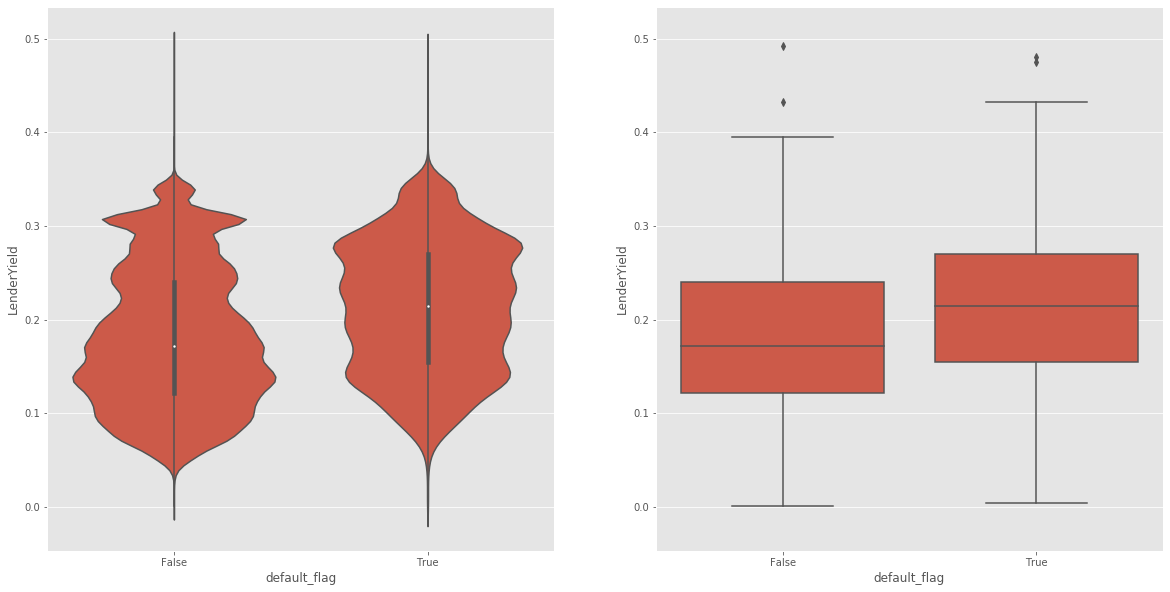

In [67]:
plt.figure(figsize = [20, 10])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_loandata, x = 'default_flag', y = 'LenderYield', color = base_color);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df_loandata, x = 'default_flag', y = 'LenderYield', color = base_color);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


#### Lender yield is on average higher if the borrower doesn't own home property

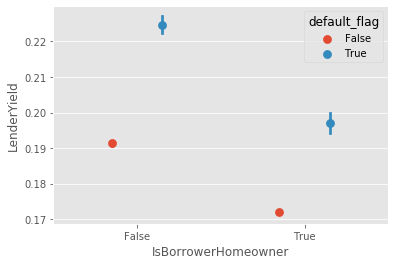

In [68]:
ax = sb.pointplot(data = df_loandata, x = 'IsBorrowerHomeowner', y = 'LenderYield', hue = 'default_flag',
                  dodge = 0.3, linestyles = "")


#### Lender yield of default group is on average higher across each income range group  

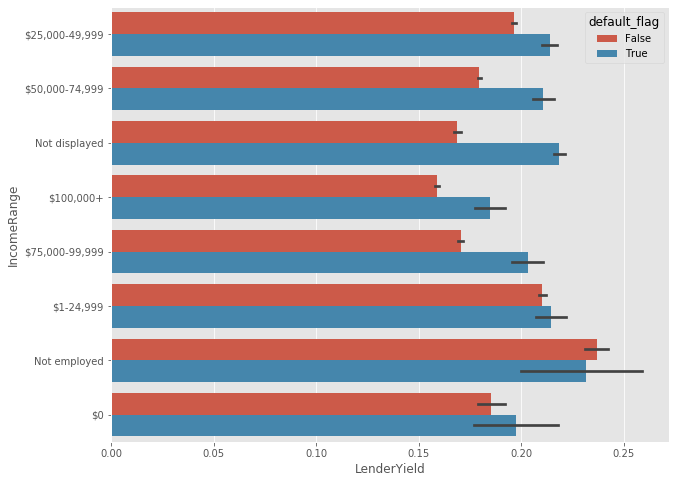

In [69]:
plt.figure(figsize = [10, 8])
ax = sb.barplot(data = df_loandata, x = 'LenderYield' ,y ='IncomeRange' , hue ='default_flag')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Regareding the Lender Yield,I found the Lender Yield of defaulted group is on average higher than non-default group. The same patter still holds if borrower with home property or across income group. To summarize all observations, personal financial health such as income, employment and asset are the main factors to dertermine lender yield. Besides, Lender Yield also implies higher default risk as we obseve that the yield of default group is much higher than the other.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!